In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import dataset
data = pd.read_csv('data_car/car_data.csv')
# EDA
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
data.duplicated().sum()

2

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

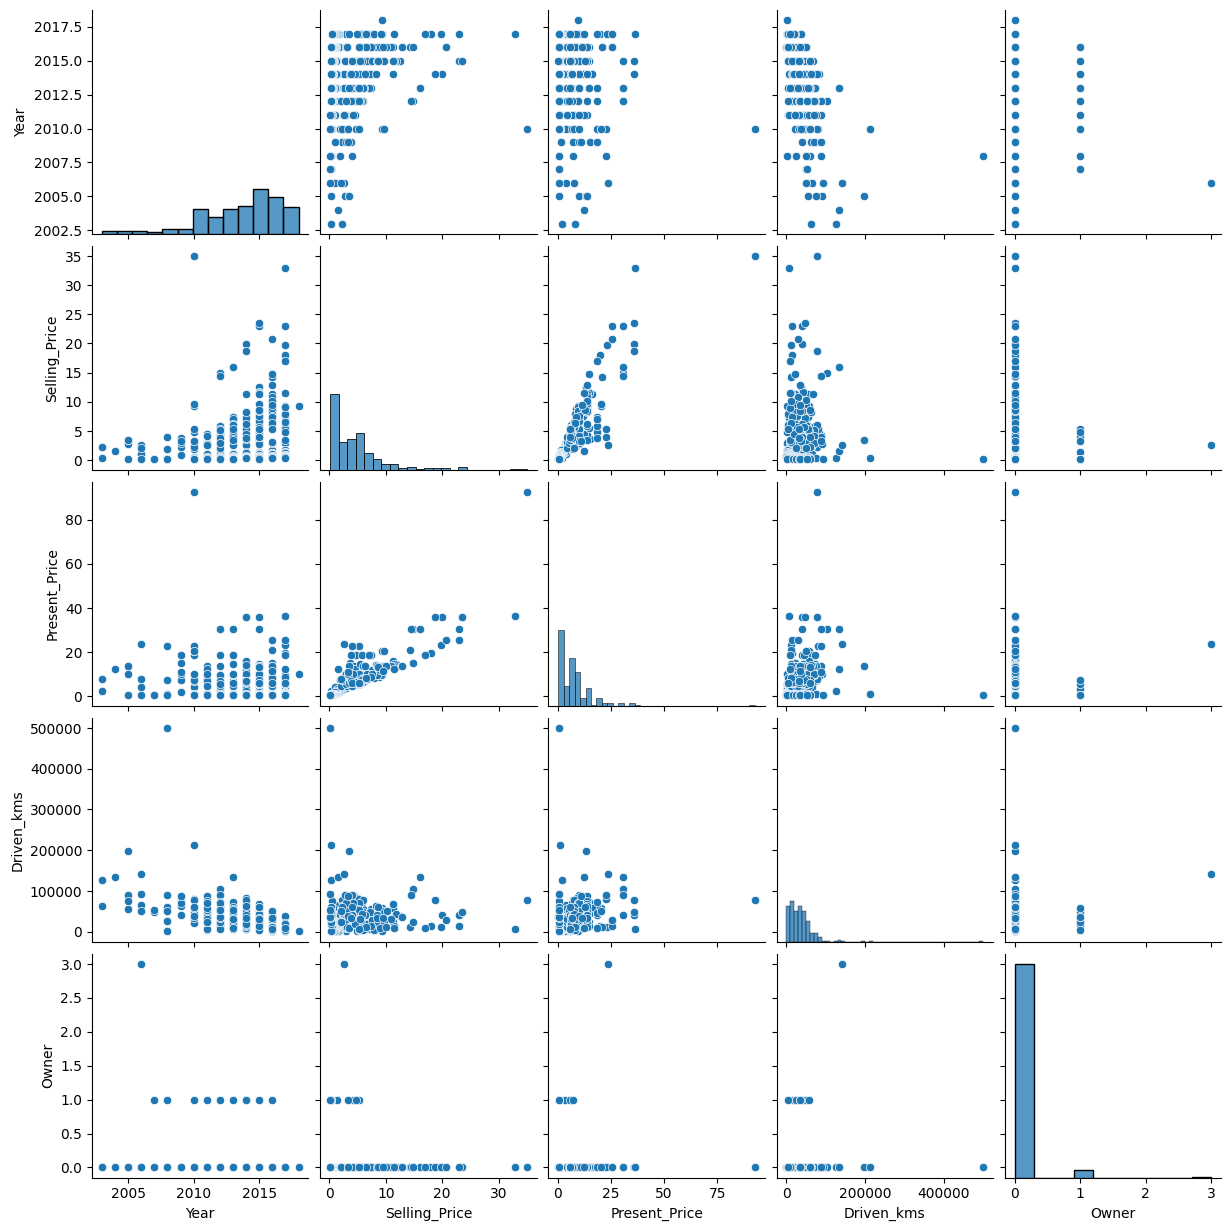

In [10]:
sns.pairplot(data)
plt.show()

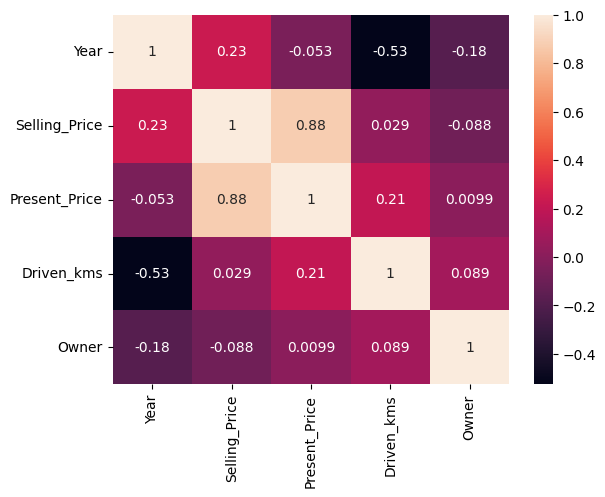

In [11]:
cols = [
    'Year',
    'Selling_Price',
    'Present_Price',
    'Driven_kms',
    'Owner'
]
cols_data = data[cols]
cor = cols_data.corr()
sns.heatmap(cor, annot=True)
plt.show()

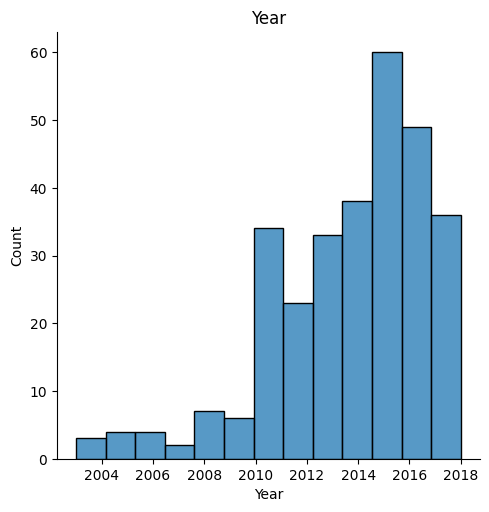

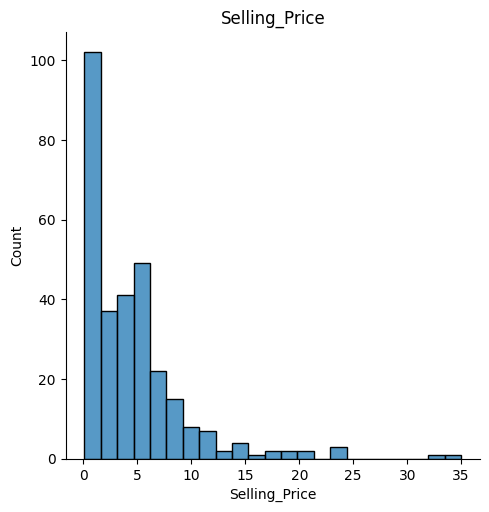

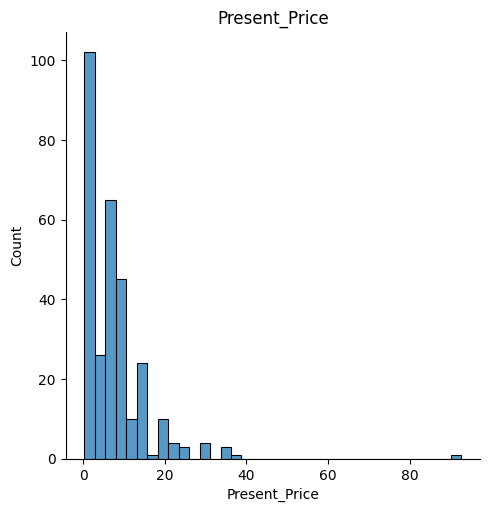

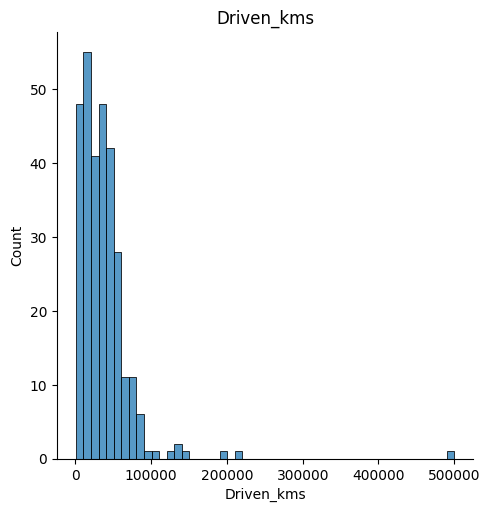

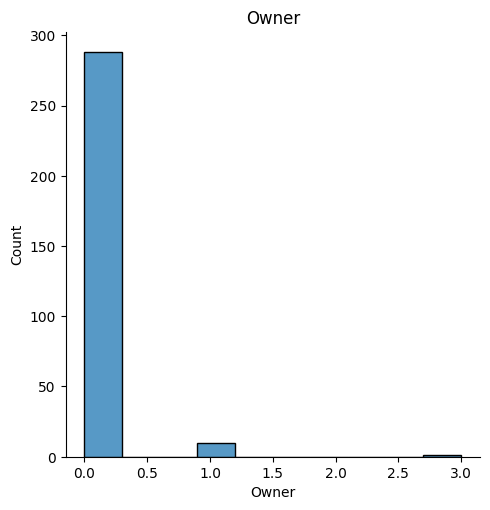

In [12]:
for feat in cols:
  sns.displot(data[feat])
  plt.title(f'{feat}')
  plt.show()

Index(['city', 'corolla altis', 'verna', 'brio', 'fortuner', 'ciaz', 'innova',
       'i20', 'grand i10', 'jazz'],
      dtype='object', name='Car_Name')


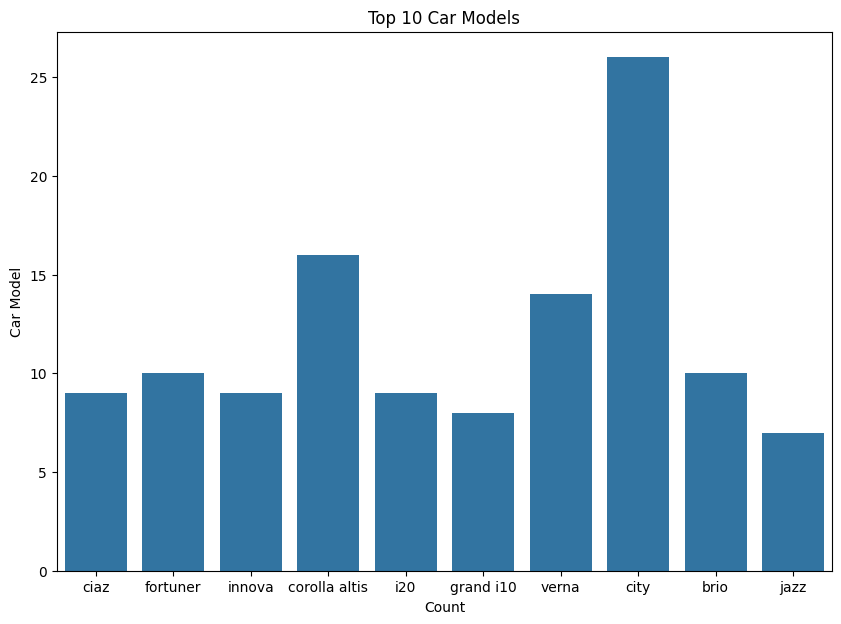

In [13]:
n = 10
top_models = data['Car_Name'].value_counts()[:n].index
print(top_models)
plt.figure(figsize=(10, 7))
sns.countplot(x='Car_Name', data=data[data['Car_Name'].isin(top_models)])
plt.title('Top 10 Car Models')
plt.xlabel('Count')
plt.ylabel('Car Model')
plt.show()

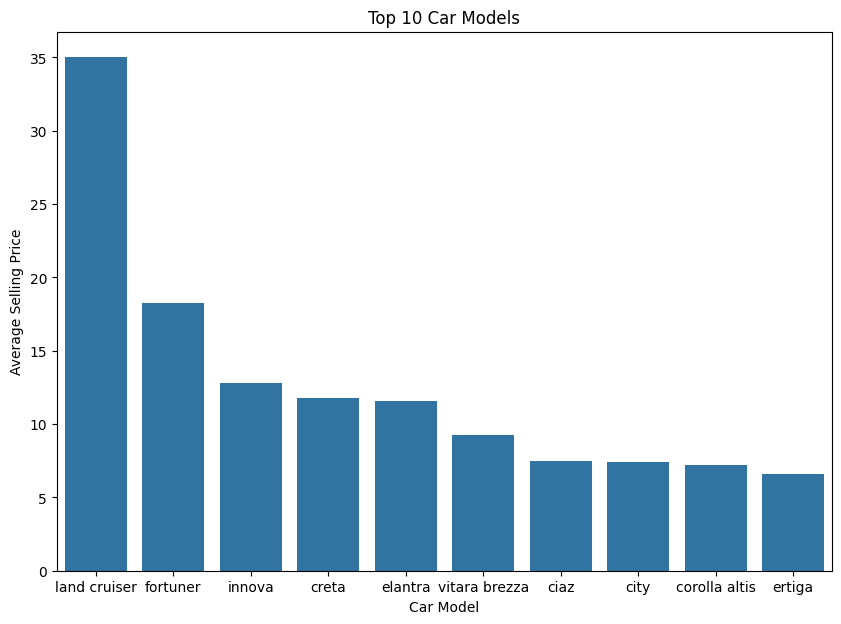

In [14]:
avg_prices = data.groupby('Car_Name')['Selling_Price'].mean()
n=10
top_cars = avg_prices.sort_values(ascending=False)[:n].index
plt.figure(figsize=(10, 7))
sns.barplot(x=top_cars, y=avg_prices[top_cars])
plt.title('Top 10 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Average Selling Price')
plt.show()

In [15]:
print(data['Fuel_Type'].value_counts())
print(data['Selling_type'].value_counts())
print(data['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [16]:
data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
data.replace({'Selling_type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

In [17]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [18]:
X = data.drop(['Car_Name','Selling_Price'], axis=1)
y = data['Selling_Price']
X,y

(     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
 0    2014           5.59       27000          0             0             0   
 1    2013           9.54       43000          1             0             0   
 2    2017           9.85        6900          0             0             0   
 3    2011           4.15        5200          0             0             0   
 4    2014           6.87       42450          1             0             0   
 ..    ...            ...         ...        ...           ...           ...   
 296  2016          11.60       33988          1             0             0   
 297  2015           5.90       60000          0             0             0   
 298  2009          11.00       87934          0             0             0   
 299  2017          12.50        9000          1             0             0   
 300  2016           5.90        5464          0             0             0   
 
      Owner  
 0        0  
 1        

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [20]:
model_0 = LinearRegression()
model_0.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model_0.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(2.4405659921895007, 0.8021792790308935)

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
new_car = [[2010,20000,0,1,1,0,1]]
pred = model_0.predict(new_car)
pred

array([8802.43205005])

In [25]:
new_car = [[2020,30000,0,0,0,0,1]]
pred = model_0.predict(new_car)
pred

array([13208.25960685])